In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)

mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug = pd.read_csv(mouse_drug_data)
clinical_trial = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset

comb_data = pd.merge(mouse_drug, clinical_trial, on="Mouse ID")

# Display the data table for preview

comb_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
comb_data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
vol_data = comb_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
mean_tvol = vol_data.mean()

# Convert to DataFrame
grp_data = pd.DataFrame(mean_tvol)
new_grp_data = grp_data.reset_index()
# Preview DataFrame
new_grp_data.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err = vol_data.sem()

# Convert to DataFrame
grp_err = pd.DataFrame (std_err)
new_grp_err = grp_err.reset_index()
# Preview DataFrame
new_grp_err.head(10)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [81]:
# Minor Data Munging to Re-Format the Data Frames
drug_data = new_grp_data.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
mung_err_data = new_grp_err.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

In [82]:
# Preview that Reformatting worked
mung_err_data.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


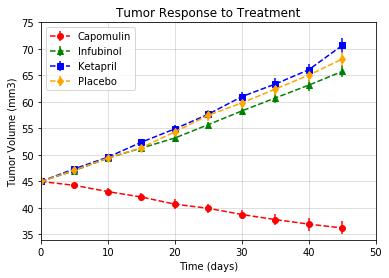

In [83]:
# Generate the Plot (with Error Bars)
plot_data = drug_data[["Capomulin","Infubinol","Ketapril","Placebo"]]
err_data = mung_err_data[["Capomulin","Infubinol","Ketapril","Placebo"]]

plt.errorbar(plot_data.index,plot_data['Capomulin'], yerr=err_data['Capomulin'] ,linestyle="--", fmt='o', color="red", label="Capomulin")
plt.errorbar(plot_data.index,plot_data['Infubinol'],  yerr=err_data['Infubinol'], linestyle="--", fmt='^', color="green", label="Infubinol")
plt.errorbar(plot_data.index,plot_data['Ketapril'],  yerr=err_data['Ketapril'], linestyle="--", fmt='s', color="blue", label="Ketapril")
plt.errorbar(plot_data.index,plot_data['Placebo'],  yerr=err_data['Placebo'], linestyle="--", fmt='d', color="orange", label="Placebo")
    
plt.legend(loc="best")
plt.title('Tumor Response to Treatment')
plt.grid(alpha = 0.5)
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0,50)
plt.ylim(34,75)

# Save the Figure
plt.savefig('Plot Figures/Tumor Response to Treatment.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [67]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

group_mets = comb_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
mean_mets = group_mets.mean()

# Convert to DataFrame
mean_mets_df = pd.DataFrame(mean_mets).reset_index()


# Preview DataFrame
mean_mets_df.head(20)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [71]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_err_mets = group_mets.sem()

# Convert to DataFrame
err_mets = pd.DataFrame (std_err_mets)
new_err_mets = err_mets.reset_index()


In [72]:
# Preview DataFrame
new_err_mets.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [73]:
# Minor Data Munging to Re-Format the Data Frames
mung_mean_mets = mean_mets_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
mung_err_mets = new_err_mets.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

In [75]:
# Preview that Reformatting worked
mung_mean_mets.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


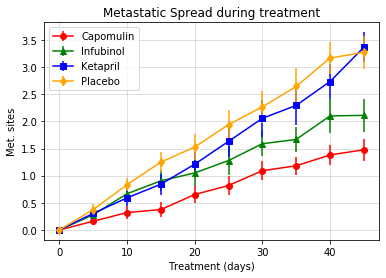

In [86]:
# Generate the Plot (with Error Bars)
plot_data2 = mung_mean_mets[["Capomulin","Infubinol","Ketapril","Placebo"]]
err_data = mung_err_mets[["Capomulin","Infubinol","Ketapril","Placebo"]]

plt.errorbar(plot_data.index,plot_data2['Capomulin'], linestyle="-", yerr=err_data["Capomulin"], fmt='o', color="red", label="Capomulin")
plt.errorbar(plot_data.index,plot_data2['Infubinol'], linestyle="-", yerr=err_data["Infubinol"], fmt='^', color="green", label="Infubinol")
plt.errorbar(plot_data.index,plot_data2['Ketapril'], linestyle="-", yerr=err_data["Ketapril"], fmt='s', color="blue", label="Ketapril")
plt.errorbar(plot_data.index,plot_data2['Placebo'], linestyle="-", yerr=err_data["Placebo"], fmt='d', color="orange", label="Placebo")

plt.legend(loc="best")
plt.title('Metastatic Spread during treatment')
plt.grid(alpha = 0.5)
plt.xlabel('Treatment (days)')
plt.ylabel('Met. sites')

# Save the Figure
plt.savefig('Plot Figures/Metastatic Spread During Treatment.png')
# Show the Figure
plt.show()

## Survival Rates

In [158]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group = comb_data.groupby(["Drug", "Timepoint"])["Mouse ID"]
count_mice = mice_group.nunique()
total_mice = comb_data["Mouse ID"].nunique()

# Convert to DataFrame
mice_df = pd.DataFrame({"Mouse count": count_mice})
new_mice_df = mice_df.reset_index()

In [98]:
# Preview DataFrame
new_mice_df.tail()

,Drug,Timepoint,Mouse count
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14
99,Zoniferol,45,14


In [17]:
# Minor Data Munging to Re-Format the Data Frames
mung_mice_df = new_mice_df.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

In [18]:
# Preview the Data Frame
mung_mice_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


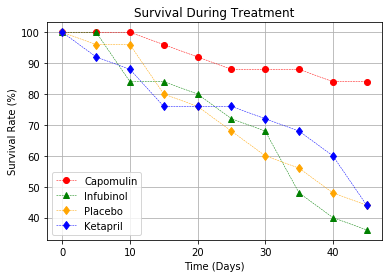

In [157]:
# Generate the Plot (Accounting for percentages
survival_rate1 = (mung_mice_df["Capomulin"] / 25) * 100
survival_rate2 = (mung_mice_df["Infubinol"] / 25) * 100
survival_rate3 = (mung_mice_df["Placebo"] / 25) * 100
survival_rate4 = (mung_mice_df["Ketapril"] / 25) * 100

plt.plot(survival_rate1, color="red", marker="o", linestyle="--", label="Capomulin", linewidth=0.5)
plt.plot(survival_rate2, color="green", marker="^", linestyle="--", label="Infubinol", linewidth=0.5)
plt.plot(survival_rate3, color="orange", marker="d", linestyle="--", label="Placebo", linewidth=0.5)
plt.plot(survival_rate4, color="blue", marker="d", linestyle="--", label="Ketapril", linewidth=0.5)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best")

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug


# Display the data to confirm


In [21]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)